In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

/home/riktim/anaconda3/envs/jde/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/riktim/anaconda3/envs/jde/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
data= pd.read_csv('./data/new.csv')
data['TimeStamp']=pd.to_datetime(data['TimeStamp'])
data['population_type'] = data['Noise(dB)'].apply(lambda x: 1 if x >=61 else 0)
data['year']=data['TimeStamp'].dt.year
data['month']=data['TimeStamp'].dt.month
data['day']=data['TimeStamp'].dt.day
data['hours']=data['TimeStamp'].dt.hour
data['minutes']=data['TimeStamp'].dt.minute
data['seconds']=data['TimeStamp'].dt.second

data['session']=data['hours'].apply(lambda x: 1 if (x==12 or (x>=1 and x<=4))  else (0 if (x>=9 and x<=11) else 2))
data['noise_categorical']=data['noise_category'].apply(lambda x: 0 if (x=="General") else 1)
data['region_categorical']=data['region_category'].apply(lambda x: 0 if(x=="Residential") else (1 if (x=="Street/Road") else (2 if (x=="Railway Station") else (3 if (x=="Hospital") else 4))))


In [18]:
data.head()

,Latitude,Longitude,Noise(dB),TimeStamp,tolerance_level,noise_category,region_category,population_type,year,month,day,hours,minutes,seconds,session,noise_categorical,region_categorical
0,22.496325,88.374760,61.3,2018-11-06 01:47:00,Normal,General,Residential,1,2018,11,6,1,47,0,1,0,0
1,22.496333,88.374812,67.0,2018-11-06 01:47:00,Normal,General,Residential,1,2018,11,6,1,47,0,1,0,0
2,22.496318,88.374857,67.8,2018-11-06 01:47:00,Normal,General,Residential,1,2018,11,6,1,47,0,1,0,0
3,22.496300,88.374872,70.6,2018-11-06 01:47:00,Normal,General,Residential,1,2018,11,6,1,47,0,1,0,0
4,22.496290,88.374952,72.0,2018-11-06 01:47:00,Normal,General,Residential,1,2018,11,6,1,47,0,1,0,0


In [3]:
train=data[0:3768]
test=data[3768:]

In [4]:
from sklearn.utils import shuffle
train = shuffle(train)
train_y=train['Noise(dB)']
test_y=test['Noise(dB)']

In [5]:
columns = ['Noise(dB)','tolerance_level','noise_category','region_category','TimeStamp']
train.drop(columns,axis=1,inplace=True)
test.drop(columns,axis=1,inplace=True)

/home/riktim/anaconda3/envs/jde/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
train_X=train
test_X=test

In [12]:
LR = [1,0.1,0.01]
train_loss=[]
val_loss=[]

for i in LR:
    #Defines linear regression model and its structure
    model = Sequential()
    model.add(Dense(1, input_shape=(12,)))
    
    #Compiles model
    model.compile(Adam(lr=i), 'mean_squared_error')
    
    #Fits model
    history = model.fit(train_X, train_y, epochs = 500, validation_split = 0.1,verbose = 2)
    history_dict=history.history
    
    #Plots model's training cost/loss and model's validation split cost/loss
    train_loss.append(history_dict['loss'])
    val_loss.append(history_dict['val_loss'])
    #plt.figure()
    #plt.plot(loss_values,'bo',label='training loss')
    #plt.plot(val_loss_values,'r',label='val training loss')

Train on 3391 samples, validate on 377 samples
Epoch 1/500
 - 1s - loss: 840.6216 - val_loss: 13.0520
Epoch 2/500
 - 0s - loss: 12.5025 - val_loss: 11.8194
Epoch 3/500
 - 0s - loss: 12.4908 - val_loss: 12.5480
Epoch 4/500
 - 0s - loss: 12.9299 - val_loss: 12.0790
Epoch 5/500
 - 0s - loss: 13.2660 - val_loss: 12.2414
Epoch 6/500
 - 0s - loss: 13.0386 - val_loss: 13.8227
Epoch 7/500
 - 0s - loss: 13.1512 - val_loss: 12.2238
Epoch 8/500
 - 0s - loss: 13.3155 - val_loss: 12.3205
Epoch 9/500
 - 0s - loss: 13.2828 - val_loss: 12.5949
Epoch 10/500
 - 0s - loss: 13.0831 - val_loss: 14.0449
Epoch 11/500
 - 0s - loss: 13.0945 - val_loss: 12.8254
Epoch 12/500
 - 0s - loss: 13.1061 - val_loss: 15.5276
Epoch 13/500
 - 0s - loss: 13.5572 - val_loss: 14.6542
Epoch 14/500
 - 0s - loss: 13.6914 - val_loss: 12.6296
Epoch 15/500
 - 0s - loss: 13.7433 - val_loss: 14.5904
Epoch 16/500
 - 0s - loss: 14.1147 - val_loss: 12.7642
Epoch 17/500
 - 0s - loss: 13.7817 - val_loss: 13.3278
Epoch 18/500
 - 0s - loss:

Epoch 149/500
 - 0s - loss: 14.6056 - val_loss: 13.8907
Epoch 150/500
 - 0s - loss: 14.6200 - val_loss: 14.6899
Epoch 151/500
 - 0s - loss: 14.8765 - val_loss: 14.0881
Epoch 152/500
 - 0s - loss: 13.8117 - val_loss: 14.4629
Epoch 153/500
 - 0s - loss: 16.4859 - val_loss: 16.2683
Epoch 154/500
 - 0s - loss: 15.1083 - val_loss: 16.9742
Epoch 155/500
 - 0s - loss: 16.9030 - val_loss: 12.9233
Epoch 156/500
 - 0s - loss: 14.8079 - val_loss: 13.3136
Epoch 157/500
 - 0s - loss: 14.3377 - val_loss: 12.8430
Epoch 158/500
 - 0s - loss: 15.1934 - val_loss: 18.3253
Epoch 159/500
 - 0s - loss: 15.3070 - val_loss: 12.9310
Epoch 160/500
 - 0s - loss: 14.9970 - val_loss: 14.1670
Epoch 161/500
 - 0s - loss: 14.2249 - val_loss: 14.7412
Epoch 162/500
 - 0s - loss: 15.2243 - val_loss: 13.8007
Epoch 163/500
 - 0s - loss: 15.5573 - val_loss: 14.0245
Epoch 164/500
 - 0s - loss: 14.7444 - val_loss: 13.7576
Epoch 165/500
 - 0s - loss: 15.8806 - val_loss: 15.5985
Epoch 166/500
 - 0s - loss: 15.2078 - val_loss: 

Epoch 296/500
 - 0s - loss: 15.0636 - val_loss: 13.1578
Epoch 297/500
 - 0s - loss: 15.7306 - val_loss: 13.2218
Epoch 298/500
 - 0s - loss: 14.5542 - val_loss: 14.7066
Epoch 299/500
 - 0s - loss: 15.8880 - val_loss: 13.4666
Epoch 300/500
 - 0s - loss: 15.5451 - val_loss: 12.9748
Epoch 301/500
 - 0s - loss: 15.0490 - val_loss: 16.6361
Epoch 302/500
 - 0s - loss: 16.1548 - val_loss: 12.6949
Epoch 303/500
 - 0s - loss: 15.1447 - val_loss: 13.3054
Epoch 304/500
 - 0s - loss: 14.8366 - val_loss: 17.1202
Epoch 305/500
 - 0s - loss: 14.8395 - val_loss: 14.0321
Epoch 306/500
 - 0s - loss: 14.8655 - val_loss: 13.0373
Epoch 307/500
 - 0s - loss: 15.0783 - val_loss: 12.9218
Epoch 308/500
 - 0s - loss: 14.1631 - val_loss: 15.4088
Epoch 309/500
 - 0s - loss: 14.4232 - val_loss: 15.2113
Epoch 310/500
 - 0s - loss: 14.8726 - val_loss: 13.5856
Epoch 311/500
 - 0s - loss: 15.5053 - val_loss: 15.6471
Epoch 312/500
 - 0s - loss: 14.8875 - val_loss: 12.3346
Epoch 313/500
 - 0s - loss: 14.4198 - val_loss: 

Epoch 443/500
 - 0s - loss: 16.2075 - val_loss: 17.5784
Epoch 444/500
 - 0s - loss: 16.3402 - val_loss: 16.1600
Epoch 445/500
 - 0s - loss: 15.3705 - val_loss: 17.7086
Epoch 446/500
 - 0s - loss: 15.3869 - val_loss: 12.6565
Epoch 447/500
 - 0s - loss: 15.0806 - val_loss: 14.3019
Epoch 448/500
 - 0s - loss: 15.1099 - val_loss: 17.7702
Epoch 449/500
 - 0s - loss: 15.5326 - val_loss: 12.7980
Epoch 450/500
 - 0s - loss: 14.5798 - val_loss: 13.1225
Epoch 451/500
 - 0s - loss: 14.1236 - val_loss: 14.1900
Epoch 452/500
 - 0s - loss: 15.0030 - val_loss: 13.6208
Epoch 453/500
 - 0s - loss: 15.1876 - val_loss: 13.7288
Epoch 454/500
 - 0s - loss: 14.4091 - val_loss: 13.3303
Epoch 455/500
 - 0s - loss: 14.4511 - val_loss: 14.5045
Epoch 456/500
 - 0s - loss: 14.8616 - val_loss: 12.8496
Epoch 457/500
 - 0s - loss: 14.6120 - val_loss: 15.7637
Epoch 458/500
 - 0s - loss: 14.8643 - val_loss: 13.1650
Epoch 459/500
 - 0s - loss: 15.6660 - val_loss: 14.7780
Epoch 460/500
 - 0s - loss: 15.3817 - val_loss: 

Epoch 90/500
 - 0s - loss: 12.1515 - val_loss: 11.7171
Epoch 91/500
 - 0s - loss: 12.3221 - val_loss: 11.6413
Epoch 92/500
 - 0s - loss: 12.2740 - val_loss: 12.1323
Epoch 93/500
 - 0s - loss: 12.2523 - val_loss: 11.9306
Epoch 94/500
 - 0s - loss: 12.3472 - val_loss: 11.7641
Epoch 95/500
 - 0s - loss: 12.1423 - val_loss: 11.9988
Epoch 96/500
 - 0s - loss: 12.2910 - val_loss: 12.1139
Epoch 97/500
 - 0s - loss: 12.4437 - val_loss: 11.9482
Epoch 98/500
 - 0s - loss: 12.3634 - val_loss: 12.0244
Epoch 99/500
 - 0s - loss: 12.3273 - val_loss: 12.6216
Epoch 100/500
 - 0s - loss: 12.4158 - val_loss: 11.7445
Epoch 101/500
 - 0s - loss: 12.2879 - val_loss: 12.0331
Epoch 102/500
 - 0s - loss: 12.2070 - val_loss: 11.7838
Epoch 103/500
 - 0s - loss: 12.2811 - val_loss: 12.4405
Epoch 104/500
 - 0s - loss: 12.2527 - val_loss: 11.9197
Epoch 105/500
 - 0s - loss: 12.3127 - val_loss: 11.6990
Epoch 106/500
 - 0s - loss: 12.2509 - val_loss: 11.8728
Epoch 107/500
 - 0s - loss: 12.1218 - val_loss: 11.9974
Ep

Epoch 237/500
 - 0s - loss: 12.3125 - val_loss: 11.9906
Epoch 238/500
 - 0s - loss: 12.1940 - val_loss: 11.8458
Epoch 239/500
 - 0s - loss: 12.3077 - val_loss: 12.2652
Epoch 240/500
 - 0s - loss: 12.3256 - val_loss: 11.9019
Epoch 241/500
 - 0s - loss: 12.3705 - val_loss: 12.1780
Epoch 242/500
 - 0s - loss: 12.2870 - val_loss: 12.1747
Epoch 243/500
 - 0s - loss: 12.2835 - val_loss: 11.7934
Epoch 244/500
 - 0s - loss: 12.3028 - val_loss: 11.9684
Epoch 245/500
 - 0s - loss: 12.2904 - val_loss: 11.7740
Epoch 246/500
 - 0s - loss: 12.2417 - val_loss: 11.9790
Epoch 247/500
 - 0s - loss: 12.2149 - val_loss: 11.7471
Epoch 248/500
 - 0s - loss: 12.2910 - val_loss: 11.6570
Epoch 249/500
 - 0s - loss: 12.3280 - val_loss: 12.1211
Epoch 250/500
 - 0s - loss: 12.2530 - val_loss: 11.6386
Epoch 251/500
 - 0s - loss: 12.2782 - val_loss: 11.8623
Epoch 252/500
 - 0s - loss: 12.2805 - val_loss: 11.6595
Epoch 253/500
 - 0s - loss: 12.2095 - val_loss: 11.9607
Epoch 254/500
 - 0s - loss: 12.2882 - val_loss: 

Epoch 384/500
 - 0s - loss: 12.2371 - val_loss: 11.7175
Epoch 385/500
 - 0s - loss: 12.2485 - val_loss: 12.0852
Epoch 386/500
 - 0s - loss: 12.3650 - val_loss: 11.9907
Epoch 387/500
 - 0s - loss: 12.2889 - val_loss: 11.9393
Epoch 388/500
 - 0s - loss: 12.3447 - val_loss: 11.7584
Epoch 389/500
 - 0s - loss: 12.3389 - val_loss: 11.7068
Epoch 390/500
 - 0s - loss: 12.1527 - val_loss: 11.8623
Epoch 391/500
 - 0s - loss: 12.2574 - val_loss: 11.7729
Epoch 392/500
 - 0s - loss: 12.2946 - val_loss: 11.9706
Epoch 393/500
 - 0s - loss: 12.3132 - val_loss: 11.9445
Epoch 394/500
 - 0s - loss: 12.2344 - val_loss: 11.7240
Epoch 395/500
 - 0s - loss: 12.3564 - val_loss: 11.9579
Epoch 396/500
 - 0s - loss: 12.3017 - val_loss: 11.8750
Epoch 397/500
 - 0s - loss: 12.3615 - val_loss: 11.8638
Epoch 398/500
 - 0s - loss: 12.1955 - val_loss: 12.2031
Epoch 399/500
 - 0s - loss: 12.1092 - val_loss: 12.0978
Epoch 400/500
 - 0s - loss: 12.3546 - val_loss: 11.7429
Epoch 401/500
 - 0s - loss: 12.3293 - val_loss: 

 - 0s - loss: 1225.0934 - val_loss: 1194.4018
Epoch 29/500
 - 0s - loss: 1165.4598 - val_loss: 1135.1177
Epoch 30/500
 - 0s - loss: 1107.5345 - val_loss: 1078.0216
Epoch 31/500
 - 0s - loss: 1051.5083 - val_loss: 1023.0800
Epoch 32/500
 - 0s - loss: 997.3900 - val_loss: 969.8823
Epoch 33/500
 - 0s - loss: 945.0747 - val_loss: 918.6979
Epoch 34/500
 - 0s - loss: 894.4186 - val_loss: 868.5009
Epoch 35/500
 - 0s - loss: 845.6911 - val_loss: 820.3907
Epoch 36/500
 - 0s - loss: 798.7165 - val_loss: 774.1544
Epoch 37/500
 - 0s - loss: 753.2301 - val_loss: 729.3952
Epoch 38/500
 - 0s - loss: 709.5457 - val_loss: 686.8944
Epoch 39/500
 - 0s - loss: 667.5807 - val_loss: 645.4425
Epoch 40/500
 - 0s - loss: 627.1998 - val_loss: 605.7678
Epoch 41/500
 - 0s - loss: 588.3817 - val_loss: 567.7569
Epoch 42/500
 - 0s - loss: 551.2040 - val_loss: 531.6774
Epoch 43/500
 - 0s - loss: 515.7765 - val_loss: 496.4845
Epoch 44/500
 - 0s - loss: 481.5386 - val_loss: 463.5357
Epoch 45/500
 - 0s - loss: 448.9886 

Epoch 175/500
 - 0s - loss: 11.9568 - val_loss: 11.6619
Epoch 176/500
 - 0s - loss: 11.9565 - val_loss: 11.6477
Epoch 177/500
 - 0s - loss: 11.9477 - val_loss: 11.6402
Epoch 178/500
 - 0s - loss: 11.9682 - val_loss: 11.6302
Epoch 179/500
 - 0s - loss: 11.9638 - val_loss: 11.6944
Epoch 180/500
 - 0s - loss: 11.9532 - val_loss: 11.6508
Epoch 181/500
 - 0s - loss: 11.9565 - val_loss: 11.7026
Epoch 182/500
 - 0s - loss: 11.9614 - val_loss: 11.6503
Epoch 183/500
 - 0s - loss: 11.9650 - val_loss: 11.6622
Epoch 184/500
 - 0s - loss: 11.9514 - val_loss: 11.6465
Epoch 185/500
 - 0s - loss: 11.9611 - val_loss: 11.6902
Epoch 186/500
 - 0s - loss: 11.9507 - val_loss: 11.6439
Epoch 187/500
 - 0s - loss: 11.9543 - val_loss: 11.6549
Epoch 188/500
 - 0s - loss: 11.9547 - val_loss: 11.6661
Epoch 189/500
 - 0s - loss: 11.9597 - val_loss: 11.6991
Epoch 190/500
 - 0s - loss: 11.9539 - val_loss: 11.6412
Epoch 191/500
 - 0s - loss: 11.9516 - val_loss: 11.6504
Epoch 192/500
 - 0s - loss: 11.9548 - val_loss: 

Epoch 322/500
 - 0s - loss: 11.9697 - val_loss: 11.6327
Epoch 323/500
 - 0s - loss: 11.9557 - val_loss: 11.6538
Epoch 324/500
 - 0s - loss: 11.9576 - val_loss: 11.6559
Epoch 325/500
 - 0s - loss: 11.9588 - val_loss: 11.6939
Epoch 326/500
 - 0s - loss: 11.9563 - val_loss: 11.6593
Epoch 327/500
 - 0s - loss: 11.9713 - val_loss: 11.6726
Epoch 328/500
 - 0s - loss: 11.9752 - val_loss: 11.6159
Epoch 329/500
 - 0s - loss: 11.9526 - val_loss: 11.6433
Epoch 330/500
 - 0s - loss: 11.9681 - val_loss: 11.6812
Epoch 331/500
 - 0s - loss: 11.9393 - val_loss: 11.6375
Epoch 332/500
 - 0s - loss: 11.9456 - val_loss: 11.6390
Epoch 333/500
 - 0s - loss: 11.9672 - val_loss: 11.6458
Epoch 334/500
 - 0s - loss: 11.9494 - val_loss: 11.6827
Epoch 335/500
 - 0s - loss: 11.9664 - val_loss: 11.6188
Epoch 336/500
 - 0s - loss: 11.9581 - val_loss: 11.6259
Epoch 337/500
 - 0s - loss: 11.9467 - val_loss: 11.6422
Epoch 338/500
 - 0s - loss: 11.9677 - val_loss: 11.6207
Epoch 339/500
 - 0s - loss: 11.9514 - val_loss: 

Epoch 469/500
 - 0s - loss: 11.9574 - val_loss: 11.6722
Epoch 470/500
 - 0s - loss: 11.9693 - val_loss: 11.6519
Epoch 471/500
 - 0s - loss: 11.9516 - val_loss: 11.6367
Epoch 472/500
 - 0s - loss: 11.9455 - val_loss: 11.6792
Epoch 473/500
 - 0s - loss: 11.9598 - val_loss: 11.6503
Epoch 474/500
 - 0s - loss: 11.9448 - val_loss: 11.6725
Epoch 475/500
 - 0s - loss: 11.9690 - val_loss: 11.6590
Epoch 476/500
 - 0s - loss: 11.9588 - val_loss: 11.6547
Epoch 477/500
 - 0s - loss: 11.9619 - val_loss: 11.6236
Epoch 478/500
 - 0s - loss: 11.9600 - val_loss: 11.6483
Epoch 479/500
 - 0s - loss: 11.9615 - val_loss: 11.6541
Epoch 480/500
 - 0s - loss: 11.9708 - val_loss: 11.6813
Epoch 481/500
 - 0s - loss: 11.9602 - val_loss: 11.6285
Epoch 482/500
 - 0s - loss: 11.9533 - val_loss: 11.6350
Epoch 483/500
 - 0s - loss: 11.9653 - val_loss: 11.6482
Epoch 484/500
 - 0s - loss: 11.9556 - val_loss: 11.6700
Epoch 485/500
 - 0s - loss: 11.9754 - val_loss: 11.6656
Epoch 486/500
 - 0s - loss: 11.9465 - val_loss: 

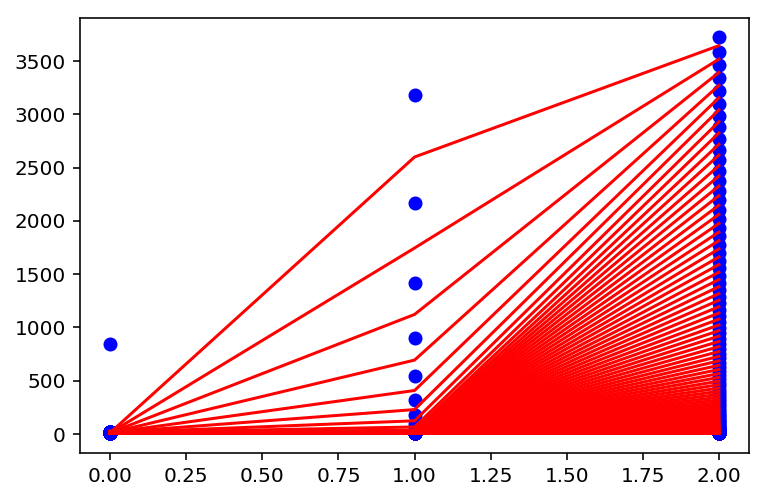

In [13]:
plt.figure()
plt.plot(train_loss,'bo',label='training loss')
plt.plot(val_loss,'r',label='val training loss')

Train on 3391 samples, validate on 377 samples
Epoch 1/500
3391/3391 [==============================] - 1s 210us/step - loss: 3728.9857 - val_loss: 3709.1750
Epoch 2/500
3391/3391 [==============================] - 0s 67us/step - loss: 3711.7515 - val_loss: 3693.5187
Epoch 3/500
3391/3391 [==============================] - 0s 63us/step - loss: 3693.4054 - val_loss: 3677.1406
Epoch 4/500
3391/3391 [==============================] - 0s 81us/step - loss: 3674.2453 - val_loss: 3659.4010
Epoch 5/500
3391/3391 [==============================] - 0s 76us/step - loss: 3653.1992 - val_loss: 3639.2349
Epoch 6/500
3391/3391 [==============================] - 0s 69us/step - loss: 3630.5231 - val_loss: 3618.4440
Epoch 7/500
3391/3391 [==============================] - 0s 71us/step - loss: 3606.6788 - val_loss: 3595.1311
Epoch 8/500
3391/3391 [==============================] - 0s 72us/step - loss: 3580.9064 - val_loss: 3569.8811
Epoch 9/500
3391/3391 [==============================] - 0s 68us/step - 

3391/3391 [==============================] - 0s 74us/step - loss: 1664.9736 - val_loss: 1719.4976
Epoch 148/500
3391/3391 [==============================] - 0s 69us/step - loss: 1658.9732 - val_loss: 1713.5980
Epoch 149/500
3391/3391 [==============================] - 0s 69us/step - loss: 1653.0442 - val_loss: 1707.7716
Epoch 150/500
3391/3391 [==============================] - 0s 68us/step - loss: 1647.1727 - val_loss: 1702.0028
Epoch 151/500
3391/3391 [==============================] - 0s 70us/step - loss: 1641.3682 - val_loss: 1696.2703
Epoch 152/500
3391/3391 [==============================] - 0s 67us/step - loss: 1635.6251 - val_loss: 1690.6466
Epoch 153/500
3391/3391 [==============================] - 0s 67us/step - loss: 1629.9574 - val_loss: 1685.0261
Epoch 154/500
3391/3391 [==============================] - 0s 67us/step - loss: 1624.3340 - val_loss: 1679.5394
Epoch 155/500
3391/3391 [==============================] - 0s 67us/step - loss: 1618.7788 - val_loss: 1674.0842
Epoch 

3391/3391 [==============================] - 0s 68us/step - loss: 1198.6888 - val_loss: 1264.2819
Epoch 294/500
3391/3391 [==============================] - 0s 67us/step - loss: 1196.4115 - val_loss: 1262.2264
Epoch 295/500
3391/3391 [==============================] - 0s 64us/step - loss: 1194.2002 - val_loss: 1260.2480
Epoch 296/500
3391/3391 [==============================] - 0s 68us/step - loss: 1192.0549 - val_loss: 1258.3466
Epoch 297/500
3391/3391 [==============================] - 0s 66us/step - loss: 1189.9723 - val_loss: 1256.5035
Epoch 298/500
3391/3391 [==============================] - 0s 63us/step - loss: 1187.9591 - val_loss: 1254.6306
Epoch 299/500
3391/3391 [==============================] - 0s 67us/step - loss: 1185.9816 - val_loss: 1252.8699
Epoch 300/500
3391/3391 [==============================] - 0s 67us/step - loss: 1184.0602 - val_loss: 1251.1318
Epoch 301/500
3391/3391 [==============================] - 0s 67us/step - loss: 1182.1610 - val_loss: 1249.4327
Epoch 

3391/3391 [==============================] - 0s 69us/step - loss: 793.9543 - val_loss: 849.1013
Epoch 440/500
3391/3391 [==============================] - 0s 68us/step - loss: 786.7312 - val_loss: 842.6520
Epoch 441/500
3391/3391 [==============================] - 0s 68us/step - loss: 779.7648 - val_loss: 836.2144
Epoch 442/500
3391/3391 [==============================] - 0s 64us/step - loss: 772.9957 - val_loss: 830.0590
Epoch 443/500
3391/3391 [==============================] - 0s 64us/step - loss: 766.4319 - val_loss: 823.9952
Epoch 444/500
3391/3391 [==============================] - 0s 68us/step - loss: 759.9892 - val_loss: 818.1734
Epoch 445/500
3391/3391 [==============================] - 0s 67us/step - loss: 753.4893 - val_loss: 812.2767
Epoch 446/500
3391/3391 [==============================] - 0s 66us/step - loss: 746.9525 - val_loss: 806.5613
Epoch 447/500
3391/3391 [==============================] - 0s 66us/step - loss: 740.5917 - val_loss: 801.0273
Epoch 448/500
3391/3391 

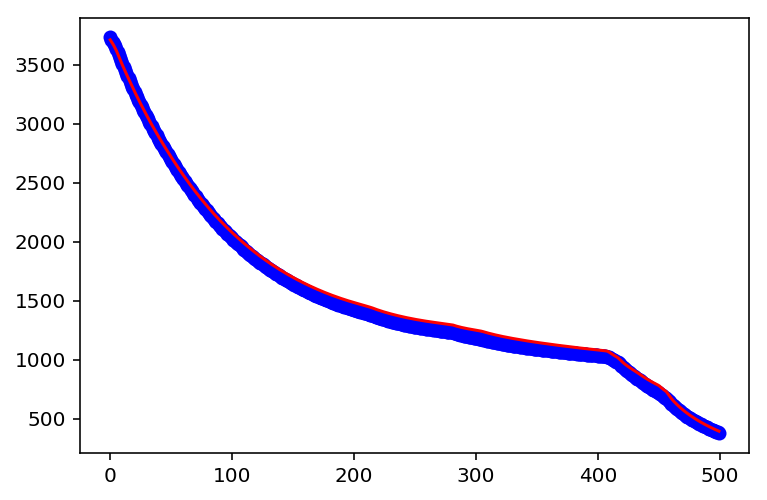

In [15]:
model = Sequential()
model.add(Dense(1, input_shape=(12,), activation = 'relu'))
model.compile(Adam(lr=0.001), 'mean_squared_error')
history = model.fit(train_X, train_y, epochs = 500, validation_split = 0.1,verbose = 1)

history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [16]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

NameError: name 'y_train' is not defined

Train on 3014 samples, validate on 754 samples
Epoch 1/1000
3014/3014 [==============================] - 1s 413us/step - loss: 1062.3983 - val_loss: 36.0696
Epoch 2/1000
3014/3014 [==============================] - 0s 110us/step - loss: 27.1874 - val_loss: 19.0841
Epoch 3/1000
3014/3014 [==============================] - 0s 114us/step - loss: 17.4672 - val_loss: 13.8922
Epoch 4/1000
3014/3014 [==============================] - 0s 111us/step - loss: 14.0477 - val_loss: 12.8428
Epoch 5/1000
3014/3014 [==============================] - 0s 116us/step - loss: 12.5721 - val_loss: 11.1613
Epoch 6/1000
3014/3014 [==============================] - 0s 109us/step - loss: 12.1324 - val_loss: 10.6077
Epoch 7/1000
3014/3014 [==============================] - 0s 114us/step - loss: 11.8094 - val_loss: 10.3799
Epoch 8/1000
3014/3014 [==============================] - 0s 134us/step - loss: 11.2801 - val_loss: 12.2723
Epoch 9/1000
3014/3014 [==============================] - 0s 122us/step - loss: 11.4068

3014/3014 [==============================] - 0s 120us/step - loss: 10.8641 - val_loss: 10.3174
Epoch 77/1000
3014/3014 [==============================] - 0s 118us/step - loss: 10.1099 - val_loss: 11.0000
Epoch 78/1000
3014/3014 [==============================] - 0s 124us/step - loss: 11.1848 - val_loss: 10.7793
Epoch 79/1000
3014/3014 [==============================] - 0s 117us/step - loss: 10.5573 - val_loss: 9.9913
Epoch 80/1000
3014/3014 [==============================] - 0s 114us/step - loss: 10.5132 - val_loss: 11.0078
Epoch 81/1000
3014/3014 [==============================] - 0s 124us/step - loss: 10.5662 - val_loss: 8.7840
Epoch 82/1000
3014/3014 [==============================] - 0s 117us/step - loss: 10.2537 - val_loss: 11.3734
Epoch 83/1000
3014/3014 [==============================] - 0s 112us/step - loss: 10.5043 - val_loss: 8.8948
Epoch 84/1000
3014/3014 [==============================] - 0s 124us/step - loss: 9.9304 - val_loss: 8.8823
Epoch 85/1000
3014/3014 [=============

Epoch 227/1000
3014/3014 [==============================] - 0s 123us/step - loss: 9.1155 - val_loss: 9.8975
Epoch 228/1000
3014/3014 [==============================] - 0s 111us/step - loss: 9.5436 - val_loss: 8.6429
Epoch 229/1000
3014/3014 [==============================] - 0s 110us/step - loss: 9.2517 - val_loss: 8.4467
Epoch 230/1000
3014/3014 [==============================] - 0s 109us/step - loss: 9.0977 - val_loss: 8.5677
Epoch 231/1000
3014/3014 [==============================] - 0s 109us/step - loss: 9.3963 - val_loss: 9.1704
Epoch 232/1000
3014/3014 [==============================] - 0s 110us/step - loss: 9.5440 - val_loss: 8.8574
Epoch 233/1000
3014/3014 [==============================] - 0s 112us/step - loss: 9.3559 - val_loss: 8.4032
Epoch 234/1000
3014/3014 [==============================] - 0s 120us/step - loss: 9.7185 - val_loss: 8.4435
Epoch 235/1000
3014/3014 [==============================] - 0s 109us/step - loss: 9.5838 - val_loss: 8.9280
Epoch 236/1000
3014/3014 [==

Epoch 303/1000
3014/3014 [==============================] - 0s 114us/step - loss: 9.5474 - val_loss: 8.7573
Epoch 304/1000
3014/3014 [==============================] - 0s 108us/step - loss: 8.9421 - val_loss: 8.1563
Epoch 305/1000
3014/3014 [==============================] - 0s 117us/step - loss: 9.1968 - val_loss: 10.7150
Epoch 306/1000
3014/3014 [==============================] - 0s 116us/step - loss: 9.7590 - val_loss: 9.3767
Epoch 307/1000
3014/3014 [==============================] - 0s 113us/step - loss: 9.3613 - val_loss: 8.2698
Epoch 308/1000
3014/3014 [==============================] - 0s 112us/step - loss: 8.9865 - val_loss: 8.7689
Epoch 309/1000
3014/3014 [==============================] - 0s 110us/step - loss: 8.9169 - val_loss: 8.5930
Epoch 310/1000
3014/3014 [==============================] - 0s 115us/step - loss: 9.3097 - val_loss: 9.2919
Epoch 311/1000
3014/3014 [==============================] - 0s 118us/step - loss: 9.0950 - val_loss: 8.6638
Epoch 312/1000
3014/3014 [=

Epoch 379/1000
3014/3014 [==============================] - 0s 109us/step - loss: 8.7495 - val_loss: 9.8187
Epoch 380/1000
3014/3014 [==============================] - 0s 112us/step - loss: 9.6898 - val_loss: 8.2355
Epoch 381/1000
3014/3014 [==============================] - 0s 113us/step - loss: 8.8902 - val_loss: 8.5602
Epoch 382/1000
3014/3014 [==============================] - 0s 112us/step - loss: 8.8264 - val_loss: 8.1211
Epoch 383/1000
3014/3014 [==============================] - 0s 116us/step - loss: 8.7111 - val_loss: 8.8470
Epoch 384/1000
3014/3014 [==============================] - 0s 112us/step - loss: 9.5493 - val_loss: 8.3193
Epoch 385/1000
3014/3014 [==============================] - 0s 117us/step - loss: 8.6920 - val_loss: 8.5453
Epoch 386/1000
3014/3014 [==============================] - 0s 107us/step - loss: 8.9465 - val_loss: 12.8005
Epoch 387/1000
3014/3014 [==============================] - 0s 111us/step - loss: 9.1073 - val_loss: 8.3237
Epoch 388/1000
3014/3014 [=

Epoch 455/1000
3014/3014 [==============================] - 0s 120us/step - loss: 8.5837 - val_loss: 8.0674
Epoch 456/1000
3014/3014 [==============================] - 0s 117us/step - loss: 8.4164 - val_loss: 9.4775
Epoch 457/1000
3014/3014 [==============================] - 0s 113us/step - loss: 8.8013 - val_loss: 8.0091
Epoch 458/1000
3014/3014 [==============================] - 0s 113us/step - loss: 8.5662 - val_loss: 8.7988
Epoch 459/1000
3014/3014 [==============================] - 0s 110us/step - loss: 8.7886 - val_loss: 8.7589
Epoch 460/1000
3014/3014 [==============================] - 0s 113us/step - loss: 8.9170 - val_loss: 7.9302
Epoch 461/1000
3014/3014 [==============================] - 0s 113us/step - loss: 8.5908 - val_loss: 8.1437
Epoch 462/1000
3014/3014 [==============================] - 0s 118us/step - loss: 8.6859 - val_loss: 8.0188
Epoch 463/1000
3014/3014 [==============================] - 0s 116us/step - loss: 8.4780 - val_loss: 10.6315
Epoch 464/1000
3014/3014 [=

Epoch 531/1000
3014/3014 [==============================] - 0s 111us/step - loss: 8.5107 - val_loss: 8.7803
Epoch 532/1000
3014/3014 [==============================] - 0s 110us/step - loss: 8.5808 - val_loss: 8.0804
Epoch 533/1000
3014/3014 [==============================] - 0s 108us/step - loss: 8.3373 - val_loss: 7.9989
Epoch 534/1000
3014/3014 [==============================] - 0s 108us/step - loss: 8.5814 - val_loss: 8.1012
Epoch 535/1000
3014/3014 [==============================] - 0s 129us/step - loss: 8.7810 - val_loss: 8.2150
Epoch 536/1000
3014/3014 [==============================] - 0s 121us/step - loss: 8.5094 - val_loss: 8.8897
Epoch 537/1000
3014/3014 [==============================] - 0s 113us/step - loss: 8.6011 - val_loss: 8.0378
Epoch 538/1000
3014/3014 [==============================] - 0s 114us/step - loss: 8.6408 - val_loss: 8.7566
Epoch 539/1000
3014/3014 [==============================] - 0s 119us/step - loss: 8.6383 - val_loss: 8.2203
Epoch 540/1000
3014/3014 [==

Epoch 607/1000
3014/3014 [==============================] - 0s 122us/step - loss: 8.7781 - val_loss: 7.8303
Epoch 608/1000
3014/3014 [==============================] - 0s 128us/step - loss: 8.3916 - val_loss: 7.5122
Epoch 609/1000
3014/3014 [==============================] - 0s 106us/step - loss: 8.0694 - val_loss: 7.8019
Epoch 610/1000
3014/3014 [==============================] - 0s 109us/step - loss: 8.0396 - val_loss: 7.8619
Epoch 611/1000
3014/3014 [==============================] - 0s 111us/step - loss: 8.4114 - val_loss: 7.8422
Epoch 612/1000
3014/3014 [==============================] - 0s 112us/step - loss: 8.2659 - val_loss: 8.5002
Epoch 613/1000
3014/3014 [==============================] - 0s 132us/step - loss: 8.5138 - val_loss: 7.9448
Epoch 614/1000
3014/3014 [==============================] - 0s 128us/step - loss: 8.6826 - val_loss: 7.7975
Epoch 615/1000
3014/3014 [==============================] - 0s 119us/step - loss: 8.3737 - val_loss: 8.0122
Epoch 616/1000
3014/3014 [==

Epoch 683/1000
3014/3014 [==============================] - 0s 104us/step - loss: 7.8699 - val_loss: 7.8962
Epoch 684/1000
3014/3014 [==============================] - 0s 103us/step - loss: 8.1507 - val_loss: 8.5605
Epoch 685/1000
3014/3014 [==============================] - 0s 106us/step - loss: 8.3531 - val_loss: 9.1207
Epoch 686/1000
3014/3014 [==============================] - 0s 109us/step - loss: 8.1189 - val_loss: 8.1904
Epoch 687/1000
3014/3014 [==============================] - 0s 132us/step - loss: 8.3168 - val_loss: 7.6844
Epoch 688/1000
3014/3014 [==============================] - 0s 130us/step - loss: 8.2173 - val_loss: 7.8200
Epoch 689/1000
3014/3014 [==============================] - 0s 130us/step - loss: 8.1208 - val_loss: 7.8874
Epoch 690/1000
3014/3014 [==============================] - 0s 143us/step - loss: 8.3654 - val_loss: 7.6122
Epoch 691/1000
3014/3014 [==============================] - 0s 102us/step - loss: 8.0167 - val_loss: 8.0486
Epoch 692/1000
3014/3014 [==

Epoch 759/1000
3014/3014 [==============================] - 0s 120us/step - loss: 7.8702 - val_loss: 7.9013
Epoch 760/1000
3014/3014 [==============================] - 0s 107us/step - loss: 7.9734 - val_loss: 7.8309
Epoch 761/1000
3014/3014 [==============================] - 0s 99us/step - loss: 8.0277 - val_loss: 7.9763
Epoch 762/1000
3014/3014 [==============================] - 0s 114us/step - loss: 8.3358 - val_loss: 8.0656
Epoch 763/1000
3014/3014 [==============================] - 0s 107us/step - loss: 7.9706 - val_loss: 7.6635
Epoch 764/1000
3014/3014 [==============================] - 0s 105us/step - loss: 8.0463 - val_loss: 8.1940
Epoch 765/1000
3014/3014 [==============================] - 0s 106us/step - loss: 7.8435 - val_loss: 8.0238
Epoch 766/1000
3014/3014 [==============================] - 0s 100us/step - loss: 7.8933 - val_loss: 7.9354
Epoch 767/1000
3014/3014 [==============================] - 0s 111us/step - loss: 8.1281 - val_loss: 7.7155
Epoch 768/1000
3014/3014 [===

Epoch 835/1000
3014/3014 [==============================] - 0s 102us/step - loss: 7.7318 - val_loss: 7.6167
Epoch 836/1000
3014/3014 [==============================] - 0s 103us/step - loss: 7.7030 - val_loss: 7.5745
Epoch 837/1000
3014/3014 [==============================] - 0s 115us/step - loss: 7.6537 - val_loss: 11.3500
Epoch 838/1000
3014/3014 [==============================] - 0s 114us/step - loss: 7.8919 - val_loss: 7.4320
Epoch 839/1000
3014/3014 [==============================] - 0s 104us/step - loss: 7.6807 - val_loss: 7.5681
Epoch 840/1000
3014/3014 [==============================] - 0s 106us/step - loss: 7.7938 - val_loss: 8.6561
Epoch 841/1000
3014/3014 [==============================] - 0s 104us/step - loss: 7.9149 - val_loss: 7.8442
Epoch 842/1000
3014/3014 [==============================] - 0s 117us/step - loss: 7.8371 - val_loss: 7.6849
Epoch 843/1000
3014/3014 [==============================] - 0s 115us/step - loss: 7.8298 - val_loss: 7.5709
Epoch 844/1000
3014/3014 [=

Epoch 911/1000
3014/3014 [==============================] - 0s 106us/step - loss: 7.6222 - val_loss: 7.7260
Epoch 912/1000
3014/3014 [==============================] - 0s 103us/step - loss: 7.6910 - val_loss: 7.9032
Epoch 913/1000
3014/3014 [==============================] - 0s 134us/step - loss: 7.5707 - val_loss: 7.7509
Epoch 914/1000
3014/3014 [==============================] - 0s 112us/step - loss: 7.6320 - val_loss: 8.0067
Epoch 915/1000
3014/3014 [==============================] - 0s 105us/step - loss: 7.5811 - val_loss: 9.6663
Epoch 916/1000
3014/3014 [==============================] - 0s 105us/step - loss: 7.8984 - val_loss: 7.9958
Epoch 917/1000
3014/3014 [==============================] - 0s 110us/step - loss: 7.6195 - val_loss: 7.7055
Epoch 918/1000
3014/3014 [==============================] - 0s 118us/step - loss: 7.5848 - val_loss: 7.2967
Epoch 919/1000
3014/3014 [==============================] - 0s 106us/step - loss: 7.6208 - val_loss: 8.5983
Epoch 920/1000
3014/3014 [==

Epoch 987/1000
3014/3014 [==============================] - 0s 110us/step - loss: 7.6292 - val_loss: 13.1081
Epoch 988/1000
3014/3014 [==============================] - 0s 149us/step - loss: 8.5520 - val_loss: 7.5249
Epoch 989/1000
3014/3014 [==============================] - 0s 110us/step - loss: 7.1600 - val_loss: 7.6717
Epoch 990/1000
3014/3014 [==============================] - 0s 109us/step - loss: 7.6704 - val_loss: 8.2135
Epoch 991/1000
3014/3014 [==============================] - 0s 105us/step - loss: 7.4919 - val_loss: 7.8289
Epoch 992/1000
3014/3014 [==============================] - 0s 115us/step - loss: 7.3293 - val_loss: 8.1991
Epoch 993/1000
3014/3014 [==============================] - 0s 110us/step - loss: 7.4119 - val_loss: 7.6064
Epoch 994/1000
3014/3014 [==============================] - 0s 126us/step - loss: 7.2438 - val_loss: 7.2404
Epoch 995/1000
3014/3014 [==============================] - 0s 105us/step - loss: 7.6089 - val_loss: 8.2998
Epoch 996/1000
3014/3014 [=

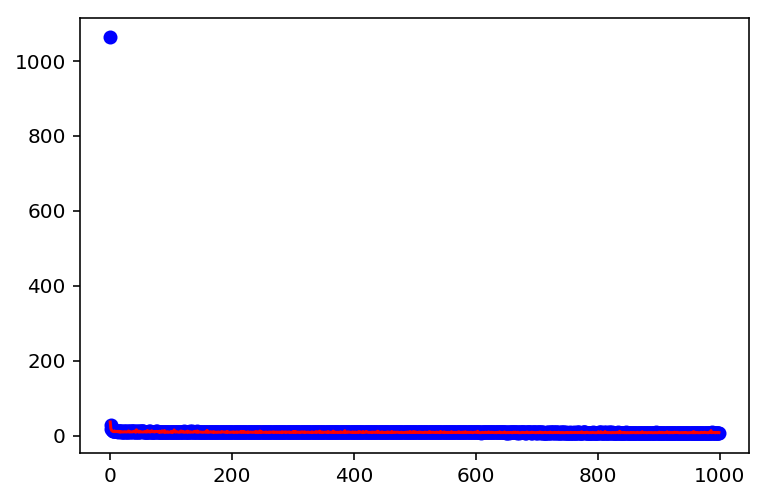

In [18]:
model = Sequential()
model.add(Dense(26, input_shape=(12,), activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), 'mean_squared_error')

# Runs model for 2000 iterations and assigns this to 'history'
history = model.fit(train_X, train_y, epochs = 1000, validation_split = 0.2, verbose = 1)

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

Train on 3014 samples, validate on 754 samples
Epoch 1/2000
3014/3014 [==============================] - 2s 519us/step - loss: 964.5162 - val_loss: 27.0505
Epoch 2/2000
3014/3014 [==============================] - 0s 109us/step - loss: 22.4885 - val_loss: 17.2253
Epoch 3/2000
3014/3014 [==============================] - 0s 113us/step - loss: 16.0235 - val_loss: 14.9009
Epoch 4/2000
3014/3014 [==============================] - 0s 112us/step - loss: 13.3696 - val_loss: 12.5489
Epoch 5/2000
3014/3014 [==============================] - 0s 118us/step - loss: 12.5345 - val_loss: 14.0506
Epoch 6/2000
3014/3014 [==============================] - 0s 111us/step - loss: 12.1700 - val_loss: 10.6293
Epoch 7/2000
3014/3014 [==============================] - 0s 111us/step - loss: 11.5177 - val_loss: 10.5180
Epoch 8/2000
3014/3014 [==============================] - 0s 111us/step - loss: 11.4998 - val_loss: 10.2750
Epoch 9/2000
3014/3014 [==============================] - 0s 121us/step - loss: 11.6425 

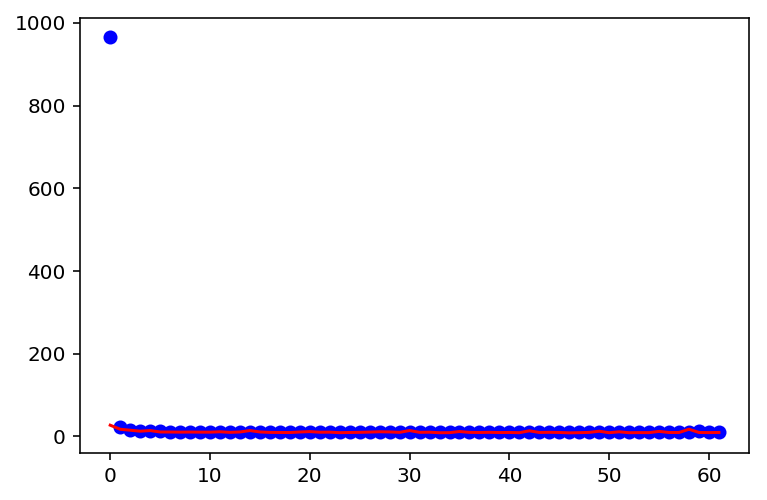

In [20]:
model = Sequential()
model.add(Dense(26, input_shape=(12,), activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), 'mean_squared_error')

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(train_X, train_y, epochs = 2000, validation_split = 0.2,shuffle = True, verbose = 1, 
                    callbacks = [earlystopper])

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')



In [ ]:
# Runs model with its current weights on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))